<a href="https://colab.research.google.com/github/JonasSouza871/Estatistica_python/blob/main/Regress%C3%A3o_Linear_e_T%C3%A9cnicas_Avan%C3%A7adas_de_Modelagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Análises preliminares

--------

## 1.1.Conhecendo o dataset

----------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
dados = pd.read_csv("dataset.csv", sep=";")
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


- Valor de oferta do imovel
- Area (metro quadrado)
- Distância Praia (km)
- Distância farmácia (km)

In [3]:
dados.shape #O dataset possui 5000 imoveis cadastrados.

(5000, 4)

- O projeto deverá ser feito para que um modelo consiga prever o valor de um imóvel apartir das variáveis.

## 1.2. Análise preliminares

---------------

In [4]:
dados.describe() #informações dos dados

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,1.402926e+06,121.944800,3.021920,0.497160
std,1.883269e+06,90.536969,3.170933,0.291355
min,7.500000e+04,16.000000,0.000000,0.000331
25%,4.600000e+05,70.000000,0.438417,0.238640
50%,8.200000e+05,93.000000,1.476958,0.503260
75%,1.590000e+06,146.000000,5.605379,0.747737
max,2.500000e+07,2000.000000,17.962942,0.999987


In [5]:
dados.corr()

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.000000,0.710974,-0.366542,-0.024366
Area,0.710974,1.000000,-0.283371,-0.030990
Dist_Praia,-0.366542,-0.283371,1.000000,0.025645
Dist_Farmacia,-0.024366,-0.030990,0.025645,1.000000


- Vemos grande relação entre os dados de area e valor do imóvel. Outra que podemos levar como relativo é a distância da praia, visto que apresenta 0,36 negativo, ou seja quanto maior a distancia da praia menor o valor do imovel.

# 2. Análises gráficas

-----------

## 2.1. Comportamento da variável dependente

------

/tmp/ipython-input-1217481302.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados["Valor"])


<Axes: xlabel='Valor', ylabel='Density'>

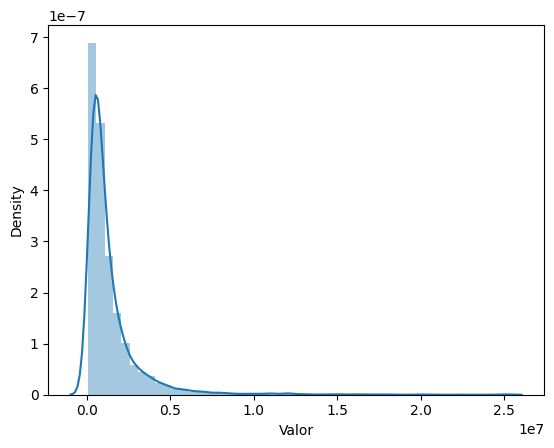

In [6]:
sns.distplot(dados["Valor"])

Text(0.5, 0, 'Valor')

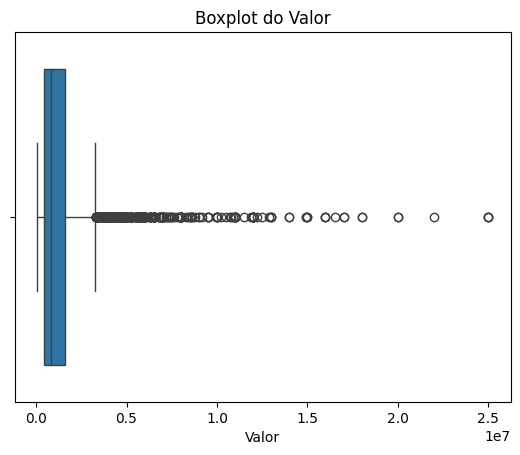

In [7]:
ax = sns.boxplot(dados["Valor"],orient = 'h')
ax.set_title("Boxplot do Valor")
ax.set_xlabel("Valor")

- Vemos inúmeros outliers, o que é normal já que se trata de preços de imóveis .

- vemos que a mediana e a grande quantidade de dados ficam com valor menores que 5 milhoes.

## 2.2. Distribuiçao de frequência dos dados

-----

- Vendo como se trata a distribuição:

/tmp/ipython-input-2633088522.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Valor'])


Text(0.5, 0, 'Valor')

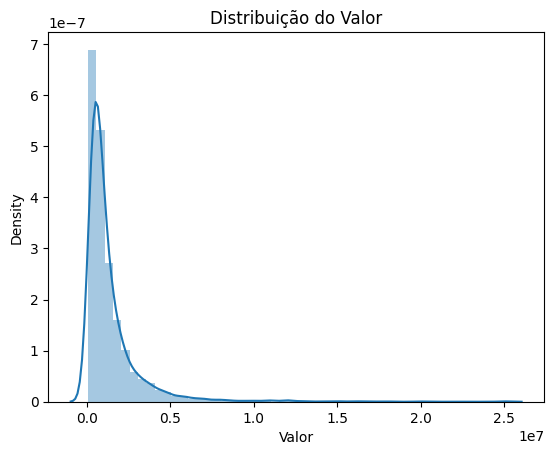

In [8]:
ax = sns.distplot(dados['Valor'])
ax.set_title("Distribuição do Valor")
ax.set_xlabel("Valor")

- Aparenta ser uma distribuição assimétrica a direita. Onde a maioria dos imóveis tem valor menor.

- Logo a mediana se fica mais a direita, mais perto do primeiro quantil.

- A ideia é tentar fazer alguma modificação nos dados para ficar algo mais próximo de uma distribuição normal simétrica onde a mediana fique ao centro. Isso porque na configuração atual pode inserir erros no modelo de regressão.

## 2.3. Dispersão entre as variáveis

------------

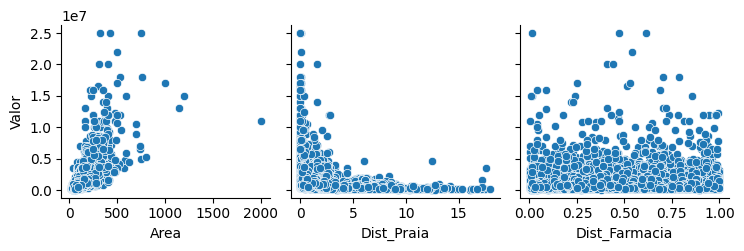

In [9]:
ax = sns.pairplot(dados, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'])

- No primeior caso vemos quase que uma curva exponencial comparando o preço da area com o valor.

- No segundo caso, vemos que é quanto menor a distancia para a praia maior é o preço. Porém não conseguimos traçar nenhuma reta nesse caso.

- No terceiro caso, não é possível ver uma relação clara.

- ### **Visualizar a dispersão nos gráficos**

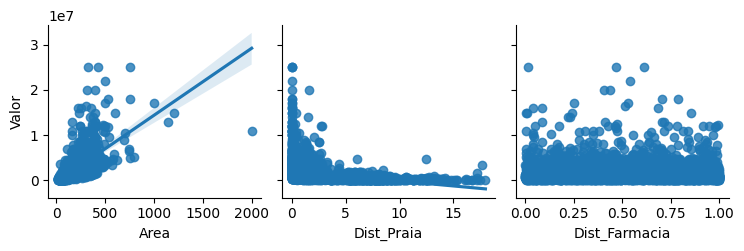

In [10]:
ax = sns.pairplot(dados, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'],kind = 'reg')

- vemos que todas estão longes de ser uma regressão linear padrão. A que mais assemelham é a área x valor.

# 3. Transformação de variáveis.

----

## 3.1. Transformação de dados

- transformando os dados para que a distribuição se pareça mais como uma normal

- Transformar os dados para escala logaritmica.

In [11]:
import numpy as np

- Temos que ter cuidado no detalhe que alguns dados de distancia estao zerados, e log de 0 é infinito.

- Para resolver isso, iremos adicionar 1 nos dados de distancia

In [12]:
np.log(0)

/tmp/ipython-input-2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


np.float64(-inf)

In [13]:
np.log(1)

np.float64(0.0)

In [14]:
dados['log_Valor']  = np.log(dados['Valor'])
dados['log_Area']  = np.log(dados['Area'])
dados['log_Dist_Praia'] = np.log(dados['Dist_Praia'] + 1)
dados['log_Dist_Farmacia'] = np.log(dados['Dist_Farmacia']+ 1)

In [15]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


/tmp/ipython-input-3759443666.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados['log_Valor'])


<Axes: xlabel='log_Valor', ylabel='Density'>

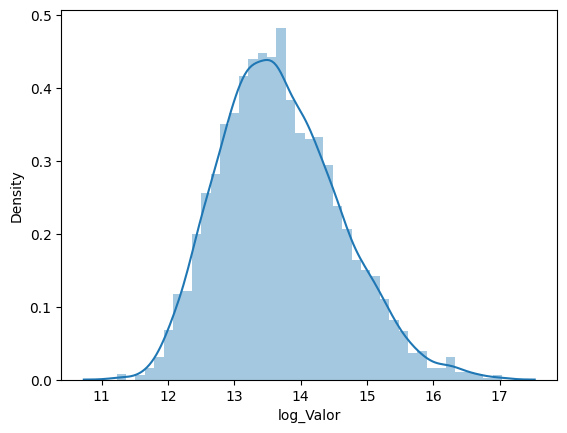

In [16]:
sns.distplot(dados['log_Valor'])

 - Vemos que melhorou muito a distibuição do valor, que agora está se assemelhando muiot com uma normal. Vamos verificar as outras variáveis:

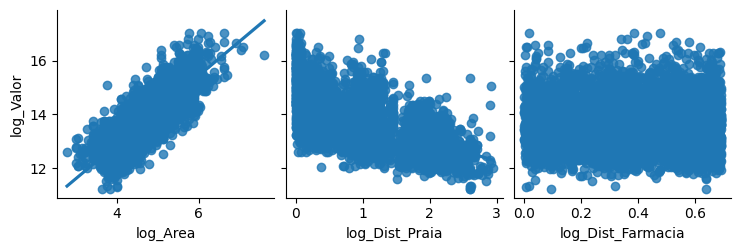

In [17]:
ax = sns.pairplot(dados, y_vars='log_Valor', x_vars=['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'],kind = 'reg')

- vemos agora que na relação entre Area e valor, temos algo muito melhor para analisar e trabalhar.

- vemos tambem um bom comportamento no preço e distancia da praia. Só teremos problema com a variavel de distancia farmacia, visto que não tem uma relação clara.

# 4. Regressão Linear com StatsModels

---------------

## 4.1. Criando os datasets de treino e teste

------------

In [18]:
from sklearn.model_selection import train_test_split #importando função para treino

In [19]:
y = dados['log_Valor'] #variavel dependente

In [20]:
x = dados[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']] #Variaveis explicativas

In [21]:
x_treino,x_teste, y_treino, y_teste = train_test_split(x,y,test_size = 0.2,random_state= 42) # 20% dos dados sendo de teste

- 80% dos dados para treino e 20% dos dados para teste

In [22]:
x_treino.head()

,log_Area,log_Dist_Praia,log_Dist_Farmacia
4227,4.330733,1.291784,0.575343
4676,4.356709,1.036766,0.648573
800,4.007333,2.247106,0.516836
3671,4.330733,0.949385,0.045290
4193,5.393628,2.207127,0.304156


In [23]:
y_treino.head()

,log_Valor
4227,14.077875
4676,13.480038
800,12.206073
3671,13.444447
4193,14.151983


## 4.3. Trabalhando com o statsmodels

----------------

- Como estamos usando log, teremos que usar um modelo de regressão diferente. O log linear:

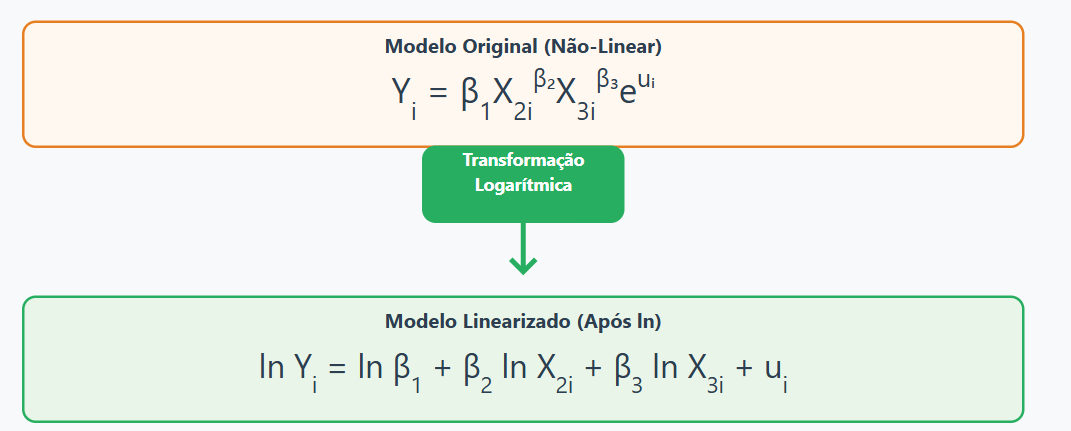

In [24]:
import statsmodels.api as sm

- Para estimar o modelo:

In [25]:
x_treino_constante = sm.add_constant(x_treino)
x_treino_constante

,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
4227,1.0,4.330733,1.291784,0.575343
4676,1.0,4.356709,1.036766,0.648573
800,1.0,4.007333,2.247106,0.516836
3671,1.0,4.330733,0.949385,0.045290
4193,1.0,5.393628,2.207127,0.304156
...,...,...,...,...
4426,1.0,5.393628,0.235646,0.611830
466,1.0,5.298317,0.123698,0.254268
3092,1.0,4.553877,0.582539,0.455215
3772,1.0,3.891820,2.158521,0.684618


In [26]:
modelo_regressao = sm.OLS(y_treino, x_treino_constante).fit()

In [27]:
modelo_regressao.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Valor   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     5430.
Date:                Sun, 17 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:43:34   Log-Likelihood:                -2014.2
No. Observations:                4000   AIC:                             4036.
Df Residuals:                    3996   BIC:                             4062.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3916      0.060    155.624      0.000       9.273       9.510
log_Area              1.0448      0.012     88.576      0.000       1.022       1.068
log_Dist_Praia       -0.4888      0.009    -56.967      0.000      -0.506      -0.472
log_Dist_Farmacia     0.0071      0.032      0.225      0.822      -0.055       0.069
==============================================================================
Omnibus:                       66.944   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.042
Skew:                           0.120   Prob(JB):                     6.34e-26
Kurtosis:                       3.799   Cond. No.                         48.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Vemos uma valor de r2 em 0.803, indicando bomr resultado

- Vemos nos valores de p_valor, o unico p_valor alto o suficiente para retirar como relevante é o da distancia da farmacia, que é 0,822 => 0.05, logo true para rejeitar a hipotese H0.

- Linha com 0.822 → coeficiente não significativo → essa variável pode não estar ajudando a explicar o modelo. LOGO A DISTÂNCIA A FARMACIA NÃO EXPLICA OS VALORES DO IMÓVEL.

## 4.4. Modificando o modelo e avaliando o ajuste

----------

- refazer treino e teste

In [28]:
X = dados[['log_Area', 'log_Dist_Praia']] #deixando somente o que é relevante para melhorar o modelo
x

,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,5.634790,0.215857,0.584245
1,5.337538,0.644028,0.126187
2,5.135798,0.057821,0.352991
3,4.605170,1.356655,0.422036
4,5.099866,0.214916,0.175946
...,...,...,...
4995,4.248495,0.391608,0.561266
4996,4.852030,2.261189,0.314935
4997,4.248495,0.225651,0.351647
4998,4.007333,2.297093,0.519367


In [29]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [30]:
x_treino_constante = sm.add_constant(x_treino)
x_treino_constante

,const,log_Area,log_Dist_Praia
1840,1.0,5.267858,0.405858
2115,1.0,4.532599,0.669865
4437,1.0,4.867534,1.036766
1146,1.0,4.553877,0.384800
2486,1.0,3.951244,1.717810
...,...,...,...
4426,1.0,5.393628,0.235646
466,1.0,5.298317,0.123698
3092,1.0,4.553877,0.582539
3772,1.0,3.891820,2.158521


In [31]:
modelo_regressao_sem_dist_farmacia = sm.OLS(y_treino, x_treino_constante).fit()
modelo_regressao_sem_dist_farmacia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Valor   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     7125.
Date:                Sun, 17 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:43:34   Log-Likelihood:                -1771.4
No. Observations:                3500   AIC:                             3549.
Df Residuals:                    3497   BIC:                             3567.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3894      0.063    149.254      0.000       9.266       9.513
log_Area           1.0455      0.013     82.850      0.000       1.021       1.070
log_Dist_Praia    -0.4893      0.009    -53.286      0.000      -0.507      -0.471
==============================================================================
Omnibus:                       69.805   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.881
Skew:                           0.151   Prob(JB):                     2.07e-27
Kurtosis:                       3.867   Cond. No.                         46.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-  R2 diminuiu um pouco, mas nada significativo, representando o que a variavel descartada realmente não influenciava na regressão.

-  Ambas variaveis que ficaram agora para no teste do p valor indicando influência na variável dependente.

# 5. Regressão linear com Scikit Learn

----

## 5.1. Estimando o modelo com os dados de treino

---

- fazendo a estimagem com o scikit learn

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [33]:
modelo_regressao_sem_dist_farmacia = LinearRegression()

- treinamento

In [34]:
modelo_regressao_sem_dist_farmacia.fit(x_treino, y_treino)

LinearRegression()

- Para ve o vallor do r2 do treinamento:

In [35]:
modelo_regressao_sem_dist_farmacia.score(x_treino, y_treino)

0.8029472475374315

- mesmo valor do econtrado no stats models.

- Para fazer a previsao:

In [36]:
y_previsto = modelo_regressao_sem_dist_farmacia.predict(x_teste) #dados de teste

- obtendo r2 para previsoes

In [37]:
r2_score(y_teste, y_previsto) # Compara o que foi previsto no modelo apartir dos dados de treino e teste
# e compara com o gabarito (y_teste) apartir disso aplica o r2 score para obter um valor

0.8007678585964251

## 5.2. Obtendo previsões pontuais
----------

In [38]:
entrada_dados = x_teste[0:1] # primeiro registro no dataset de teste
entrada_dados

,log_Area,log_Dist_Praia
1501,3.951244,1.966942


- Para estimar o valor logaritmo do preço do imovel do primeiro registro do dataset:

In [41]:
modelo_regressao_sem_dist_farmacia.predict(entrada_dados)[0]

np.float64(12.557780911439496)

In [42]:
np.exp(modelo_regressao_sem_dist_farmacia.predict(entrada_dados)[0]) #TRansforma em reais

np.float64(284298.75300618977)

- 284298 reais é o valor estimado do imóvel com as variaveis de teste na primeira linha.

- simulador simples:

In [44]:
# declarar as variaveis explicativas
Area = 250
Dist_praia = 1
entrada_dados = [[np.log(Area), np.log(Dist_praia +1)]] #a distancia da praia soma mais 1 no log pq pode assumir valor de 0
# assumindo o valor de 0, o log de 0 vai para infinito. Não podendo ser aceito assim.

In [45]:
np.log(1) #Se der 0 ele assume log 1 que irá dar 0

np.float64(0.0)

In [47]:
np.exp(modelo_regressao_sem_dist_farmacia.predict(entrada_dados)[0])
# o np.exp é usado para converter de logaritmo para reais

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(2737756.398571738)

- Com uma area de 250 m^2 e a distancia para praia sendo de 1 km (Muito perto), o modelo prever um valor de 2.7 milhões de reais nesse imóvel.

- **Se abaixarmos a area:**

In [48]:
Area = 150
Dist_praia = 1
entrada_dados = [[np.log(Area), np.log(Dist_praia +1)]] #a distancia da praia soma mais 1 no log pq pode assumir valor de 0
np.exp(modelo_regressao_sem_dist_farmacia.predict(entrada_dados)[0])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(1604948.795210358)

- Abaixando a área para 150 m^2temos que o valor estimado é de 1.6 milhões de reais

## 5.3. Interpretação dos coeficientes estimado.
---

 ### **Intercepto:**

-  O intercepto será o preço estimado excluindo todas as variáveis do modelo, ou seja zerando elas

- O resultado dessas análises sempre será em log, sendo necessário transformar em uma função exponencial para ver o valor real.

In [49]:
modelo_regressao_sem_dist_farmacia.intercept_ #valor em log do intercepto

np.float64(9.389351167807472)

In [50]:
np.exp(modelo_regressao_sem_dist_farmacia.intercept_) #valor em reais do intercepto

np.float64(11960.336562757548)

- 11960 é o vaoor do intercepto sem levar em conta nenhuma variável.

### **Coeficientes de regressao b2 e b3**

- São apenas dois coeficientes visto que o da distancia da farmacia foi excluido, entao so levaremos a area e a distancia da praia em consideração

In [54]:
print(x_treino.columns) #Verificando a ordem das coluna, log area vem primeiro e log distancia praia vem depois
modelo_regressao_sem_dist_farmacia.coef_ #valores dos coeficientes em log

Index(['log_Area', 'log_Dist_Praia'], dtype='object')


array([ 1.04545832, -0.48930319])

-  Temos o valor de 1.04 para b2 sendo o log_area e -0.4893 para b3 sendo log_dist_praia

- criando um dataframe para colocar os valores:

In [58]:
dataframe_modelo= pd.DataFrame(data = np.append(modelo_regressao_sem_dist_farmacia.intercept_,  #usa o np.append para acrescentar a um data frame os dados
                                                 modelo_regressao_sem_dist_farmacia.coef_), # Acrescenta os coeficiente b2 e b3 do
                              index = ['Intercepto'] + list(x_treino.columns), #nome do intex de cada linha sendo intercepto + os nomes das variaveis relevante
                              columns = ['Coeficientes']) # nome da coluna sendo coeficientes
dataframe_modelo

,Coeficientes
Intercepto,9.389351
log_Area,1.045458
log_Dist_Praia,-0.489303


Os coeficientes estimados foram:

| Variável         | Coeficiente | Interpretação |
|------------------|-------------|---------------|
| **Intercepto**   | 9.389       | Valor base do log do preço dos imóveis quando as variáveis independentes são zero (referência matemática, sem interpretação direta prática). |
| **log_Area**     | 1.045       | Relação positiva: imóveis com maior área têm maior valor. Um aumento de 1% na área do imóvel está associado a um aumento aproximado de **1,045% no preço**. |
| **log_Dist_Praia** | -0.489     | Relação negativa: imóveis mais distantes da praia tendem a valer menos. Um aumento de 1% na distância da praia reduz o valor do imóvel em cerca de **0,489%**. |


## 5.4. Análises Gráficas dos resultados do modelo.

---------------

Text(0.5, 1.0, 'Previsto x Real')

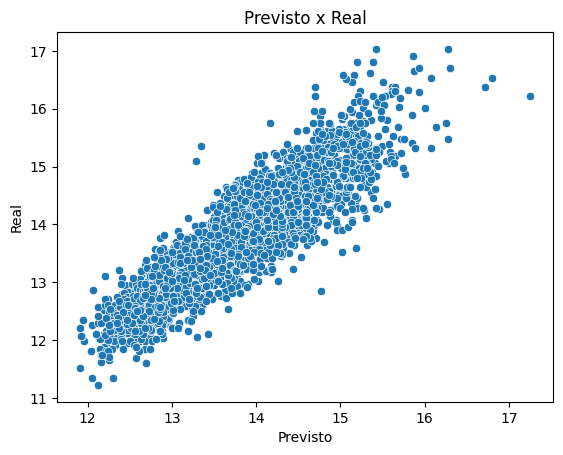

In [61]:
y_previsto_treino = modelo_regressao_sem_dist_farmacia.predict(x_treino) # previsao do y treino apartir dos dados do x de treino
ax = sns.scatterplot(x=y_previsto_treino, y = y_treino)
ax.set_xlabel('Previsto') # o  que foi previsto pelo modelo de treino
ax.set_ylabel('Real') # o que é real nos dados do y de treino
ax.set_title('Previsto x Real')

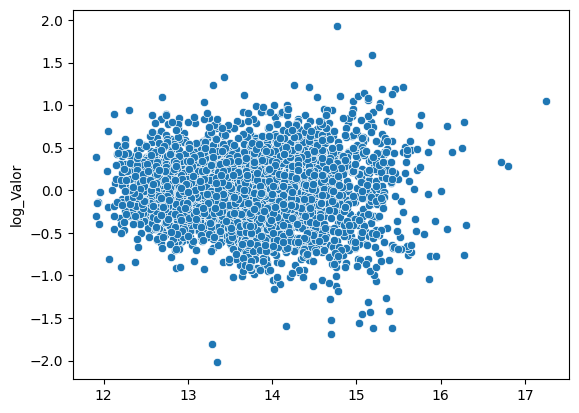

In [62]:
residuo = y_previsto_treino - y_treino
ax = sns.scatterplot(x=y_previsto_treino, y = residuo)

- Vemos um comportamento normal e aleatorio do residuo, sem muitas anomalias ou vieses

- potando a distribuição:

/tmp/ipython-input-208189129.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo)


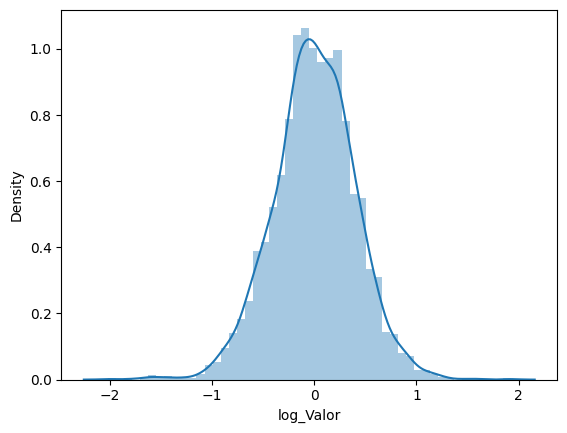

In [65]:
ax = sns.distplot(residuo)

- residuo parecendo realmente se comportando como uma normal.